In [234]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


sns.set()

# SCRAPES THE LATEST DATA FROM WORLDOMETERS
url = 'https://www.worldometers.info/coronavirus/#countries'

r = requests.get(url)

c = r.content

soup = bs(c,'html.parser')

main_table = soup.findAll('table',{'id':'main_table_countries'})

table = main_table[0]

body = table.find('tbody')
rows = body.findAll('tr')

countries = dict()

for r in rows:
    td = r.findAll('td')
    name = td[0].get_text().strip()
    confirmed = td[1].get_text().strip()
    inc = td[2].get_text().strip()
    deaths = td[3].get_text().strip()
    d_inc = td[4].get_text().strip()
    recovered = td[5].get_text().strip()
    active_cases = td[6].get_text().strip()
    serious = td[7].get_text().strip()
    conf_p_M = td[8].get_text().strip()
    countries[name] = [confirmed,inc,deaths,d_inc,
                       recovered,active_cases,serious,conf_p_M]

cols = ['confirmed','inc','dead','dead_inc','recovered',
        'active_cases','serious','confirmed_per_M']

df = pd.DataFrame.from_dict(countries)
df = df.T
df.columns = cols



df[['inc','dead_inc']] = df[['inc','dead_inc']].apply(
    lambda x : x.str.replace('+',''))

df[['confirmed','dead','recovered','active_cases',
    'serious','inc','dead_inc']] = \
    df[['confirmed','dead','recovered','active_cases',
        'serious','inc','dead_inc']].apply(
    lambda x : x.str.replace(',',''))

df[cols] = df[cols].apply(lambda x: x.replace('',np.nan))


df[cols] = df[cols].astype(float)
df['yesterday'] = df['confirmed'] - df['inc']
df['factor'] = df['confirmed'] / df['yesterday']
cols  = ['confirmed', 'yesterday','inc', 'factor','dead', 'dead_inc', 'recovered', 'active_cases',
       'serious', 'confirmed_per_M']

df = df[cols]

#df['factor'].loc[df['factor'] == np.inf]
df['factor'] = df['factor'].replace(np.inf,np.nan)
df['dead_pct'] = 100 * df['dead'] / df['confirmed']

df.head(40)

,confirmed,yesterday,inc,factor,dead,dead_inc,recovered,active_cases,serious,confirmed_per_M,dead_pct
China,80849.0,80824.0,25.0,1.000309,3199.0,10.0,66931.0,10719.0,3226.0,56.2,3.956759
Italy,24747.0,21157.0,3590.0,1.169684,1809.0,368.0,2335.0,20603.0,1672.0,409.3,7.309977
Iran,13938.0,12729.0,1209.0,1.094980,724.0,113.0,4590.0,8624.0,NaN,165.9,5.194432
S. Korea,8162.0,8086.0,76.0,1.009399,75.0,3.0,834.0,7253.0,59.0,159.2,0.918892
Spain,7843.0,6391.0,1452.0,1.227194,292.0,96.0,517.0,7034.0,272.0,167.7,3.723065
Germany,5813.0,4599.0,1214.0,1.263970,11.0,2.0,46.0,5756.0,2.0,69.4,0.189231
France,5423.0,4499.0,924.0,1.205379,127.0,36.0,12.0,5284.0,400.0,83.1,2.341877
USA,3621.0,2943.0,678.0,1.230377,63.0,6.0,59.0,3499.0,10.0,10.9,1.739851
Switzerland,2217.0,1375.0,842.0,1.612364,14.0,1.0,4.0,2199.0,NaN,256.2,0.631484
UK,1391.0,1140.0,251.0,1.220175,35.0,14.0,20.0,1336.0,20.0,20.5,2.516175


In [235]:
today = pd.to_datetime('today').strftime('%Y-%m-%d %H:%M:%S')
file_prefix = 'snapshots/corona_snapshot_'
filename = file_prefix + today.replace(' ','_').replace(':','_') + '.pkl'
df['datetime'] = [today] * len(df)
df.set_index([df.index,'datetime'],drop=True).to_pickle(filename)
df.head()

,confirmed,yesterday,inc,factor,dead,dead_inc,recovered,active_cases,serious,confirmed_per_M,dead_pct,datetime
China,80849.0,80824.0,25.0,1.000309,3199.0,10.0,66931.0,10719.0,3226.0,56.2,3.956759,2020-03-15 22:23:46
Italy,24747.0,21157.0,3590.0,1.169684,1809.0,368.0,2335.0,20603.0,1672.0,409.3,7.309977,2020-03-15 22:23:46
Iran,13938.0,12729.0,1209.0,1.094980,724.0,113.0,4590.0,8624.0,NaN,165.9,5.194432,2020-03-15 22:23:46
S. Korea,8162.0,8086.0,76.0,1.009399,75.0,3.0,834.0,7253.0,59.0,159.2,0.918892,2020-03-15 22:23:46
Spain,7843.0,6391.0,1452.0,1.227194,292.0,96.0,517.0,7034.0,272.0,167.7,3.723065,2020-03-15 22:23:46


In [236]:
import glob
files = [f for f in glob.glob('./' + file_prefix +'*')]

timeline_df = pd.DataFrame()

for f in files:
    temp = pd.read_pickle(f)
    timeline_df = pd.concat([timeline_df,temp],axis=0)
    
timeline_df.sort_index(inplace=True)
timeline_df

confirmed  yesterday  inc    factor  dead  \
            datetime                                                         
Afghanistan 2020-03-15 15:50:08       16.0       11.0  5.0  1.454545   NaN   
            2020-03-15 16:55:44       16.0       11.0  5.0  1.454545   NaN   
            2020-03-15 19:43:02       16.0       11.0  5.0  1.454545   NaN   
            2020-03-15 21:46:07       16.0       11.0  5.0  1.454545   NaN   
            2020-03-15 22:21:09       16.0       11.0  5.0  1.454545   NaN   
...                                    ...        ...  ...       ...   ...   
Vietnam     2020-03-15 16:55:44       56.0       53.0  3.0  1.056604   NaN   
            2020-03-15 19:43:02       56.0       53.0  3.0  1.056604   NaN   
            2020-03-15 21:46:07       56.0       53.0  3.0  1.056604   NaN   
            2020-03-15 22:21:09       56.0       53.0  3.0  1.056604   NaN   
            2020-03-15 22:23:46       56.0       53.0  3.0  1.056604   NaN   

                                 dead_inc  recovered  active_cases  serious  \
            datetime                                                          
Afghanistan 2020-03-15 15:50:08       NaN        1.0          15.0      NaN   
            2020-03-15 16:55:44       NaN        1.0          15.0      NaN   
            2020-03-15 19:43:02       NaN        1.0          15.0      NaN   
            2020-03-15 21:46:07       NaN        1.0          15.0      NaN   
            2020-03-15 22:21:09       NaN        1.0          15.0      NaN   
...                                   ...        ...           ...      ...   
Vietnam     2020-03-15 16:55:44       NaN       16.0          40.0      NaN   
            2020-03-15 19:43:02       NaN       16.0          40.0      NaN   
            2020-03-15 21:46:07       NaN       16.0          40.0      NaN   
            2020-03-15 22:21:09       NaN       16.0          40.0      NaN   
            2020-03-15 22:23:46       NaN       16.0          40.0      NaN   

                                 confirmed_per_M  dead_pct  
            datetime                                        
Afghanistan 2020-03-15 15:50:08              0.4       NaN  
            2020-03-15 16:55:44              0.4       NaN  
            2020-03-15 19:43:02              0.4       NaN  
            2020-03-15 21:46:07              0.4       NaN  
            2020-03-15 22:21:09              0.4       NaN  
...                                          ...       ...  
Vietnam     2020-03-15 16:55:44              0.6       NaN  
            2020-03-15 19:43:02              0.6       NaN  
            2020-03-15 21:46:07              0.6       NaN  
            2020-03-15 22:21:09              0.6       NaN  
            2020-03-15 22:23:46              0.6       NaN  

[946 rows x 11 columns]

In [251]:
timeline_group = timeline_df.groupby(level=0)

a_country = timeline_group.get_group('Spain')
a_country

confirmed  yesterday     inc    factor   dead  \
      datetime                                                             
Spain 2020-03-15 15:50:08     7753.0     6391.0  1362.0  1.213112  291.0   
      2020-03-15 16:55:44     7753.0     6391.0  1362.0  1.213112  291.0   
      2020-03-15 19:43:02     7798.0     6391.0  1407.0  1.220153  292.0   
      2020-03-15 21:46:07     7843.0     6391.0  1452.0  1.227194  292.0   
      2020-03-15 22:21:09     7843.0     6391.0  1452.0  1.227194  292.0   
      2020-03-15 22:23:46     7843.0     6391.0  1452.0  1.227194  292.0   

                           dead_inc  recovered  active_cases  serious  \
      datetime                                                          
Spain 2020-03-15 15:50:08      95.0      517.0        6945.0    272.0   
      2020-03-15 16:55:44      95.0      517.0        6945.0    272.0   
      2020-03-15 19:43:02      96.0      517.0        6989.0    272.0   
      2020-03-15 21:46:07      96.0      517.0        7034.0    272.0   
      2020-03-15 22:21:09      96.0      517.0        7034.0    272.0   
      2020-03-15 22:23:46      96.0      517.0        7034.0    272.0   

                           confirmed_per_M  dead_pct  
      datetime                                        
Spain 2020-03-15 15:50:08            165.8  3.753386  
      2020-03-15 16:55:44            165.8  3.753386  
      2020-03-15 19:43:02            166.8  3.744550  
      2020-03-15 21:46:07            167.7  3.723065  
      2020-03-15 22:21:09            167.7  3.723065  
      2020-03-15 22:23:46            167.7  3.723065

In [252]:
non_duplicates = ( ( a_country['confirmed'] != a_country['confirmed'].shift() )  | (
    a_country['dead'] != a_country['dead'].shift()))

a_country = a_country[non_duplicates]
a_country

confirmed  yesterday     inc    factor   dead  \
      datetime                                                             
Spain 2020-03-15 15:50:08     7753.0     6391.0  1362.0  1.213112  291.0   
      2020-03-15 19:43:02     7798.0     6391.0  1407.0  1.220153  292.0   
      2020-03-15 21:46:07     7843.0     6391.0  1452.0  1.227194  292.0   

                           dead_inc  recovered  active_cases  serious  \
      datetime                                                          
Spain 2020-03-15 15:50:08      95.0      517.0        6945.0    272.0   
      2020-03-15 19:43:02      96.0      517.0        6989.0    272.0   
      2020-03-15 21:46:07      96.0      517.0        7034.0    272.0   

                           confirmed_per_M  dead_pct  
      datetime                                        
Spain 2020-03-15 15:50:08            165.8  3.753386  
      2020-03-15 19:43:02            166.8  3.744550  
      2020-03-15 21:46:07            167.7  3.723065

confirmed  yesterday     inc    factor   dead  \
      datetime                                                             
Spain 2020-03-15 15:50:08     7753.0     6391.0  1362.0  1.213112  291.0   
      2020-03-15 19:43:02     7798.0     6391.0  1407.0  1.220153  292.0   
      2020-03-15 21:46:07     7843.0     6391.0  1452.0  1.227194  292.0   

                           dead_inc  recovered  active_cases  serious  \
      datetime                                                          
Spain 2020-03-15 15:50:08      95.0      517.0        6945.0    272.0   
      2020-03-15 19:43:02      96.0      517.0        6989.0    272.0   
      2020-03-15 21:46:07      96.0      517.0        7034.0    272.0   

                           confirmed_per_M  dead_pct  
      datetime                                        
Spain 2020-03-15 15:50:08            165.8  3.753386  
      2020-03-15 19:43:02            166.8  3.744550  
      2020-03-15 21:46:07            167.7  3.723065

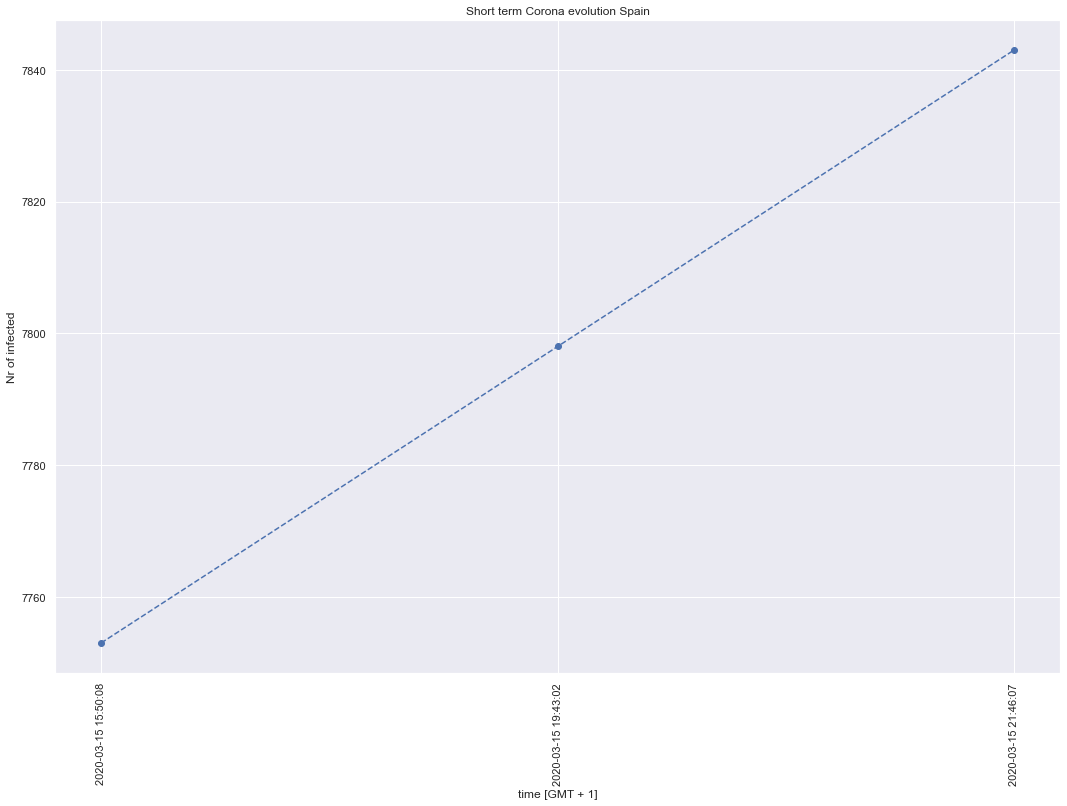

In [253]:


plt.figure(figsize=(18,12))
plt.title('Short term Corona evolution {}'.format(a_country.index[0][0]))
a_country['confirmed'].plot(style ='o--')
plt.xticks(rotation=90)
plt.xticks(range(len(a_country.index)),[a_country.index[i][1] for i in range(len(a_country.index))])
plt.xlabel('time [GMT + 1]')
plt.ylabel('Nr of infected')
filename = 'corona_short_term_' + a_country.index[0][0] + '.jpg'
plt.savefig (filename,format='jpg')
a_country.head()

In [240]:
top_dead_pct = df.loc[df['confirmed'] > 500].sort_values('dead_pct',ascending=False)
top_dead_pct

,confirmed,yesterday,inc,factor,dead,dead_inc,recovered,active_cases,serious,confirmed_per_M,dead_pct,datetime
Italy,24747.0,21157.0,3590.0,1.169684,1809.0,368.0,2335.0,20603.0,1672.0,409.3,7.309977,2020-03-15 22:23:46
Iran,13938.0,12729.0,1209.0,1.094980,724.0,113.0,4590.0,8624.0,NaN,165.9,5.194432,2020-03-15 22:23:46
China,80849.0,80824.0,25.0,1.000309,3199.0,10.0,66931.0,10719.0,3226.0,56.2,3.956759,2020-03-15 22:23:46
Spain,7843.0,6391.0,1452.0,1.227194,292.0,96.0,517.0,7034.0,272.0,167.7,3.723065,2020-03-15 22:23:46
Japan,839.0,804.0,35.0,1.043532,24.0,2.0,144.0,671.0,36.0,6.6,2.860548,2020-03-15 22:23:46
UK,1391.0,1140.0,251.0,1.220175,35.0,14.0,20.0,1336.0,20.0,20.5,2.516175,2020-03-15 22:23:46
France,5423.0,4499.0,924.0,1.205379,127.0,36.0,12.0,5284.0,400.0,83.1,2.341877,2020-03-15 22:23:46
Netherlands,1135.0,959.0,176.0,1.183525,20.0,8.0,2.0,1113.0,45.0,66.2,1.762115,2020-03-15 22:23:46
USA,3621.0,2943.0,678.0,1.230377,63.0,6.0,59.0,3499.0,10.0,10.9,1.739851,2020-03-15 22:23:46
Diamond Princess,696.0,NaN,NaN,NaN,7.0,NaN,456.0,233.0,15.0,NaN,1.005747,2020-03-15 22:23:46


In [241]:
country_names = sorted(df.index.values)
#country_names

In [242]:
df.loc[df['confirmed'] > 100].sort_values('factor',ascending=False)

,confirmed,yesterday,inc,factor,dead,dead_inc,recovered,active_cases,serious,confirmed_per_M,dead_pct,datetime
Malaysia,428.0,238.0,190.0,1.798319,NaN,NaN,42.0,386.0,9.0,13.2,NaN,2020-03-15 22:23:46
Switzerland,2217.0,1375.0,842.0,1.612364,14.0,1.0,4.0,2199.0,NaN,256.2,0.631484,2020-03-15 22:23:46
Estonia,171.0,115.0,56.0,1.486957,NaN,NaN,1.0,170.0,NaN,128.9,NaN,2020-03-15 22:23:46
Greece,331.0,228.0,103.0,1.451754,4.0,1.0,8.0,319.0,5.0,31.8,1.208459,2020-03-15 22:23:46
Portugal,245.0,169.0,76.0,1.449704,NaN,NaN,2.0,243.0,9.0,24.0,NaN,2020-03-15 22:23:46
Thailand,114.0,82.0,32.0,1.390244,1.0,NaN,35.0,78.0,1.0,1.6,0.877193,2020-03-15 22:23:46
Czechia,253.0,189.0,64.0,1.338624,NaN,NaN,NaN,253.0,2.0,23.6,NaN,2020-03-15 22:23:46
Ireland,170.0,129.0,41.0,1.317829,2.0,NaN,1.0,167.0,6.0,34.4,1.176471,2020-03-15 22:23:46
Austria,860.0,655.0,205.0,1.312977,1.0,NaN,6.0,853.0,1.0,95.5,0.116279,2020-03-15 22:23:46
Belgium,886.0,689.0,197.0,1.285922,4.0,NaN,1.0,881.0,33.0,76.4,0.451467,2020-03-15 22:23:46


In [243]:
top_10_per_m = df.sort_values('confirmed_per_M',ascending=False).head(10)
top_10_per_m

,confirmed,yesterday,inc,factor,dead,dead_inc,recovered,active_cases,serious,confirmed_per_M,dead_pct,datetime
Italy,24747.0,21157.0,3590.0,1.169684,1809.0,368.0,2335.0,20603.0,1672.0,409.3,7.309977,2020-03-15 22:23:46
Switzerland,2217.0,1375.0,842.0,1.612364,14.0,1.0,4.0,2199.0,NaN,256.2,0.631484,2020-03-15 22:23:46
Norway,1250.0,1109.0,141.0,1.127142,3.0,NaN,1.0,1246.0,27.0,230.6,0.240000,2020-03-15 22:23:46
Spain,7843.0,6391.0,1452.0,1.227194,292.0,96.0,517.0,7034.0,272.0,167.7,3.723065,2020-03-15 22:23:46
Iran,13938.0,12729.0,1209.0,1.094980,724.0,113.0,4590.0,8624.0,NaN,165.9,5.194432,2020-03-15 22:23:46
S. Korea,8162.0,8086.0,76.0,1.009399,75.0,3.0,834.0,7253.0,59.0,159.2,0.918892,2020-03-15 22:23:46
Denmark,864.0,836.0,28.0,1.033493,2.0,1.0,1.0,861.0,2.0,149.2,0.231481,2020-03-15 22:23:46
Qatar,401.0,337.0,64.0,1.189911,NaN,NaN,4.0,397.0,NaN,139.2,NaN,2020-03-15 22:23:46
Estonia,171.0,115.0,56.0,1.486957,NaN,NaN,1.0,170.0,NaN,128.9,NaN,2020-03-15 22:23:46
Bahrain,214.0,212.0,2.0,1.009434,NaN,NaN,77.0,137.0,2.0,125.8,NaN,2020-03-15 22:23:46


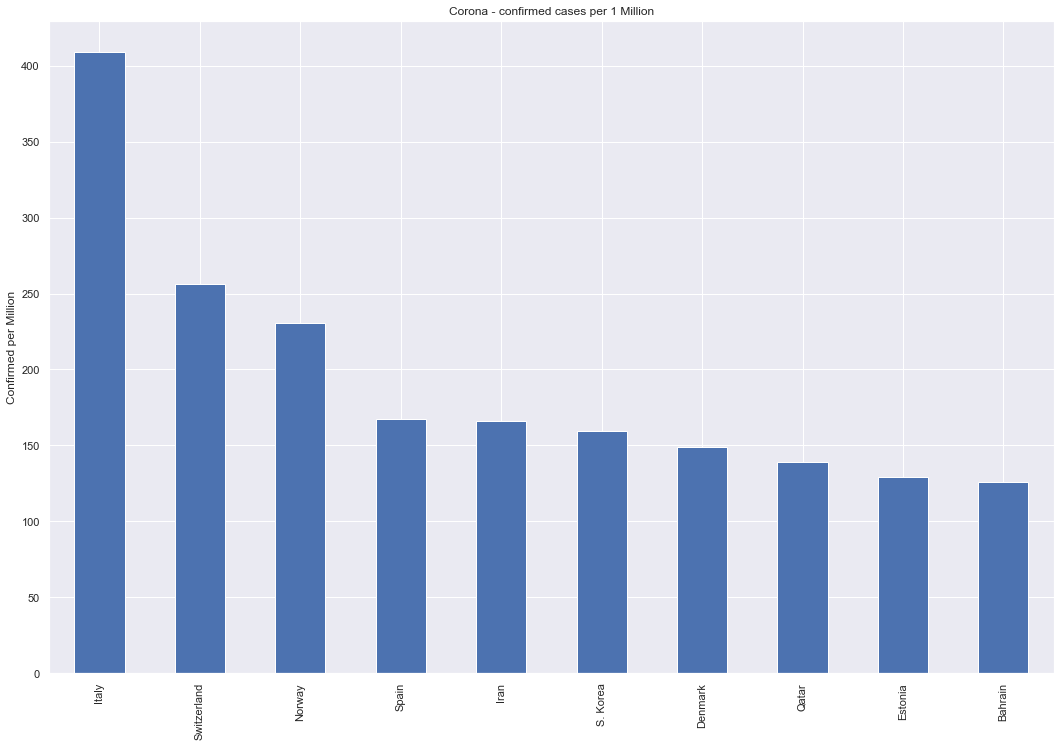

In [244]:
plt.figure(figsize=(18,12))
plt.title('Corona - confirmed cases per 1 Million')
plt.ylabel ('Confirmed per Million')
top_10_per_m['confirmed_per_M'].plot(kind='bar')
plt.savefig('confirmed_per_million.jpg',format='jpg')

In [245]:
totals = pd.DataFrame(df.sum(),columns=['totals'])
totals.drop(['factor','confirmed_per_M','dead_pct','datetime'],inplace=True)
totals

,totals
confirmed,169202
yesterday,155517
inc,12569
dead,6492
dead_inc,669
recovered,76615
active_cases,86095
serious,5913


In [246]:
country_names = list(sorted((df.index.unique().values)))
#country_names

In [247]:
some_countries = ['Sweden','USA','Italy','Spain','Norway','Finland',
                  'Denmark','Singapore','S. Korea','China','Russia',
                 'Poland','Taiwan','Estonia']
countries_of_interest = df.loc[some_countries,:]
countries_of_interest.sort_values('confirmed',inplace=True,ascending=False)
countries_of_interest

,confirmed,yesterday,inc,factor,dead,dead_inc,recovered,active_cases,serious,confirmed_per_M,dead_pct,datetime
China,80849.0,80824.0,25.0,1.000309,3199.0,10.0,66931.0,10719.0,3226.0,56.2,3.956759,2020-03-15 22:23:46
Italy,24747.0,21157.0,3590.0,1.169684,1809.0,368.0,2335.0,20603.0,1672.0,409.3,7.309977,2020-03-15 22:23:46
S. Korea,8162.0,8086.0,76.0,1.009399,75.0,3.0,834.0,7253.0,59.0,159.2,0.918892,2020-03-15 22:23:46
Spain,7843.0,6391.0,1452.0,1.227194,292.0,96.0,517.0,7034.0,272.0,167.7,3.723065,2020-03-15 22:23:46
USA,3621.0,2943.0,678.0,1.230377,63.0,6.0,59.0,3499.0,10.0,10.9,1.739851,2020-03-15 22:23:46
Norway,1250.0,1109.0,141.0,1.127142,3.0,NaN,1.0,1246.0,27.0,230.6,0.240000,2020-03-15 22:23:46
Sweden,1040.0,961.0,79.0,1.082206,3.0,1.0,1.0,1036.0,2.0,103.0,0.288462,2020-03-15 22:23:46
Denmark,864.0,836.0,28.0,1.033493,2.0,1.0,1.0,861.0,2.0,149.2,0.231481,2020-03-15 22:23:46
Finland,244.0,225.0,19.0,1.084444,NaN,NaN,10.0,234.0,NaN,44.0,NaN,2020-03-15 22:23:46
Singapore,226.0,212.0,14.0,1.066038,NaN,NaN,105.0,121.0,11.0,38.6,NaN,2020-03-15 22:23:46


In [248]:
countries_of_interest.sort_values('confirmed_per_M',ascending=False)

,confirmed,yesterday,inc,factor,dead,dead_inc,recovered,active_cases,serious,confirmed_per_M,dead_pct,datetime
Italy,24747.0,21157.0,3590.0,1.169684,1809.0,368.0,2335.0,20603.0,1672.0,409.3,7.309977,2020-03-15 22:23:46
Norway,1250.0,1109.0,141.0,1.127142,3.0,NaN,1.0,1246.0,27.0,230.6,0.240000,2020-03-15 22:23:46
Spain,7843.0,6391.0,1452.0,1.227194,292.0,96.0,517.0,7034.0,272.0,167.7,3.723065,2020-03-15 22:23:46
S. Korea,8162.0,8086.0,76.0,1.009399,75.0,3.0,834.0,7253.0,59.0,159.2,0.918892,2020-03-15 22:23:46
Denmark,864.0,836.0,28.0,1.033493,2.0,1.0,1.0,861.0,2.0,149.2,0.231481,2020-03-15 22:23:46
Estonia,171.0,115.0,56.0,1.486957,NaN,NaN,1.0,170.0,NaN,128.9,NaN,2020-03-15 22:23:46
Sweden,1040.0,961.0,79.0,1.082206,3.0,1.0,1.0,1036.0,2.0,103.0,0.288462,2020-03-15 22:23:46
China,80849.0,80824.0,25.0,1.000309,3199.0,10.0,66931.0,10719.0,3226.0,56.2,3.956759,2020-03-15 22:23:46
Finland,244.0,225.0,19.0,1.084444,NaN,NaN,10.0,234.0,NaN,44.0,NaN,2020-03-15 22:23:46
Singapore,226.0,212.0,14.0,1.066038,NaN,NaN,105.0,121.0,11.0,38.6,NaN,2020-03-15 22:23:46
